# Quantum Computing and Graph Theory - Classical Implementation

In [1]:
# Setup

import numpy as np
import matplotlib.pyplot as plt

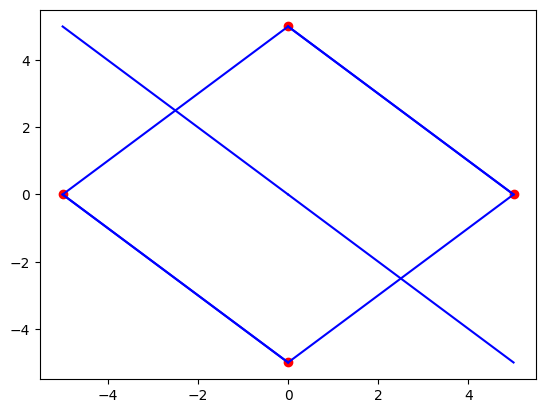

In [2]:
from graph import Graph

example_graph = Graph(np.array([
    [0,1,1],
    [1,0,1],
    [1,1,0],
]))

# print(example_graph.to_bitstring())
# print(example_graph.adj_matrix)
example_graph.plot_graph()